# Program for Uniaxial Interaction <br/>Curve of Rectangular RC- Column
Version 0.03<br/>
Distributed under the license of GNU/GPL v3<br/>

Author: Engr. Faisal ur Rehman<br/>
enggprog.com - Engineering Programs<br/>

Jupyyer Notebook Maintainer<br/>
18pwciv4991@uetpeshawar.edu.pk<br/>

This part is the same as <br/>
pre-processor for icurve.sce.<br/>

input variables for pframem.sce
for test

units = inch - kips

# Usage
## Change the values of variables
### Goto Cell ---> Run All

In [110]:
import numpy as np
import matplotlib.pyplot as plt

Change Variables from here no need for var01.bin

In [111]:
#store to var01.bin
d1 = 12;  # width of section
d2 = 20;  # height of section
d3 = 2.5; # cover c/c

fcp = 4000;    # compressive strength of concrete
fy = 60000;   # yeild strength of steel rebar
E = 29000000; # modulus of elasticity of steel rebar

s = [2.5, 6, 9.5]; # spacing of each rebar column from right edge of section
n = [3, 2, 3];     # of rebar in each column from right edge of section
Ab = [1, 1, 1];    # Area of rebar column from right edge of section

In [112]:
As = []
for i in range(len(Ab)):
    As.append( n[i] * Ab[i] )

d = d1 - d3;
eu = 0.003;
ey = fy / E;

# For Balanced Failure Mode

In [113]:
cb = d * eu / (eu + ey);
print('cb = ', str(cb))

cb =  5.622448979591836


# Full tension

In [114]:
Asfs = 0;
Asfsx =0;
fs = []
for j in range(len(s)):
    fs.append(-fy)
    Asfs = Asfs + As[j]*fs[j];
    Asfsx = Asfsx + As[j]*fs[j]*(d1/2-s[j]);
    
Pn = [Asfs/1000]
Mn = [Asfsx/12000]

In [115]:
c = 0.1;
i = 2;
while c <= d1+.1:
    #disp('loop ran for ', string(i-1))
    a = 0.85 * c;
    # finding fs
    Asfs = 0;
    Asfsx = 0;    
    for j in range(len(s)):
        fs[j] = eu*E*(c-s[j])/c;
        if fs[j] < 0:
            if fs[j] < -fy:
                 fs[j] = -fy;
        elif fs[j] > 0:
            if fs[j] > fy:
                fs[j] = fy;
        Asfs = Asfs + As[j]*fs[j];
    Asfsx = Asfsx + As[j]*fs[j]*(d1/2-s[j]);

    Pn.append( (0.85*fcp*d2*a +Asfs)/1000 );
    Mn.append( (0.85*fcp*d2*a*(d1/2-a/2) + Asfsx)/12000 );
    c = c + 0.1
    i = i+1

# Full compression

In [116]:
Asfs = 0;
Asfsx = 0;
for j in range(len(s)):
    fs[j] = fy;
    Asfs = Asfs + As[j]*fs[j];
    Asfsx = Asfsx + As[j]*fs[j]*(d1/2-s[j]);


Pn.append( (0.85*fcp*d2*d1 + Asfs)/1000);
Mn.append( (0.85*fcp*d2*d1*(0) + Asfsx)/12000);

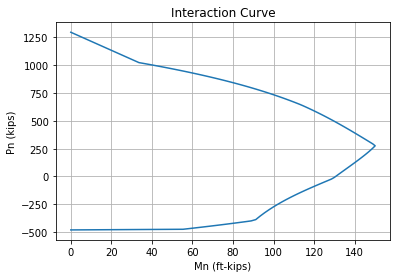

In [117]:
plt.plot(Mn, Pn)
plt.xlabel('Mn (ft-kips)')
plt.ylabel('Pn (kips)')
plt.title('Interaction Curve')
plt.grid(1)

#saves Mn data to Matrix A's first column
#saves Pn data to Matrix A's second column
A = np.array([Mn,Pn]).T
A = A.astype('float')

array = A
# format as a block of csv text to do whatever you want
csv_rows = ["{},{}".format(i, j) for i, j in array]
csv_text = "\n".join(csv_rows)

# write it to a file
with open('file.csv', 'w') as f:
    f.write(csv_text)